# Lab 2: Probability, Distributions, and Statistical Questions

## Problem 1

In 1 day, the average cosmic-ray background is some number X (0.7 for me, 3.0 for Dan), and the average number of gamma-rays emitted by your hypothetical source is Y (I shall choose 5). 

### 1A. 
Show how the probability distribution of the background changes as you integrate (sum) for more days.

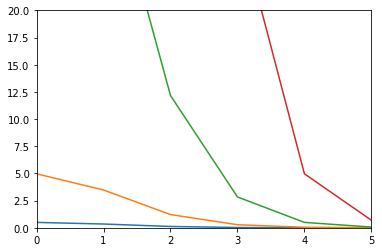

In [70]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

# Several graphs providing different amounts of days.

#Average cosmic background
mu = 0.7

#Hypothetical source
signal = 5

x_axis = range(0, 20)
poisson_base = poisson.pmf(x_axis , 0.7)

plt.xlim([0, 5])
plt.ylim([0, 20])
ax.set_yscale('log')
plt.plot(x_axis, poisson_base);
plt.plot(x_axis, poisson_base * 10);
plt.plot(x_axis, poisson_base * 100);
plt.plot(x_axis, poisson_base * 1000);

### 1B.
Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

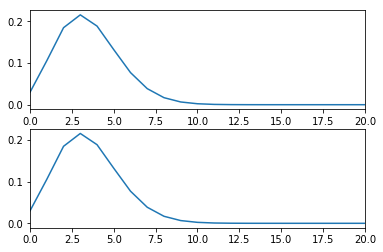

In [68]:
from scipy.signal import convolve
# To show mathematically, we compare the summed distribution with
# Convolving the one day 5 times.

mu = 0.7        #background mean
trials = 5      #number of days prescribed
first_trial_range = 21 #Number of events looked at

#Setup first trial numbers
x1_axis = range(0, first_trial_range)
poisson_1 = poisson.pmf(x1_axis, mu)

#Setup all trials numbers
trials_mu = mu * trials
xtrials_axis = range(0, (first_trial_range - 1) * trials + 1)

#new distrutions
summed_distribution = poisson.pmf(xtrials_axis, trials_mu)

convolved_distribution = convolve(poisson_1, poisson_1)
for _idx in range(2, trials):
    convolved_distribution = convolve(convolved_distribution, poisson_1)

plt.subplot(211)
plt.xlim([0, 20])
plt.plot(xtrials_axis, summed_distribution);
plt.subplot(212)
plt.xlim([0, 20])
plt.plot(xtrials_axis, convolved_distribution);

### 1C.

Show how the probability distribution evolves as you *average* days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.

In [72]:
x = np.arange(0, 21)
px = poisson.pmf(x, 0.7)
p2 = np.convolve(px, px)
x2 = np.arange(0, 41)
x2_average = x2/2


0.9999999999999999
